In [1]:
conda install -c conda-forge pandas

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
/ DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/osx-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/osx-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 304 0
- DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/noarch/curre

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

In [3]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
X, y = make_regression(n_samples=1000, random_state=0)
lr = LinearRegression()
result = cross_validate(lr, X, y)  # defaults to 5-fold CV
result['test_score']  # r_squared score is high because dataset is easy

array([1., 1., 1., 1., 1.])

Missing values:
 Age              0
BloodPressure    0
dtype: int64
Summary statistics:
               Age  BloodPressure
count   16.000000      16.000000
mean    62.500000     143.375000
std     23.804761      17.442764
min     25.000000     120.000000
25%     43.750000     129.500000
50%     62.500000     140.000000
75%     81.250000     156.250000
max    100.000000     175.000000


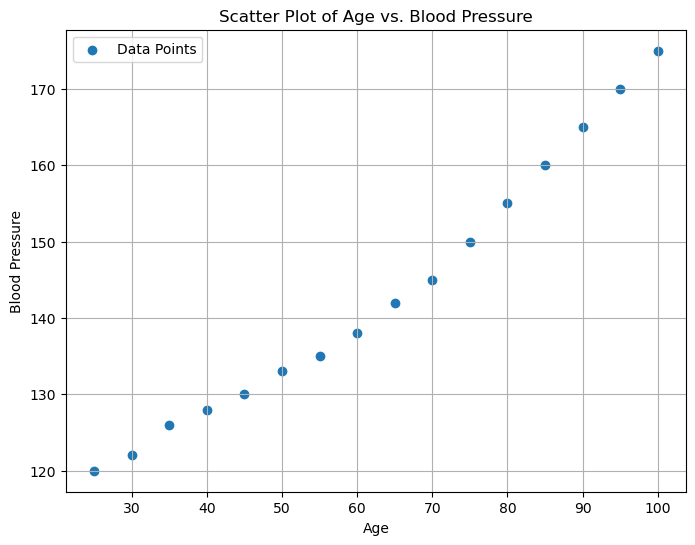

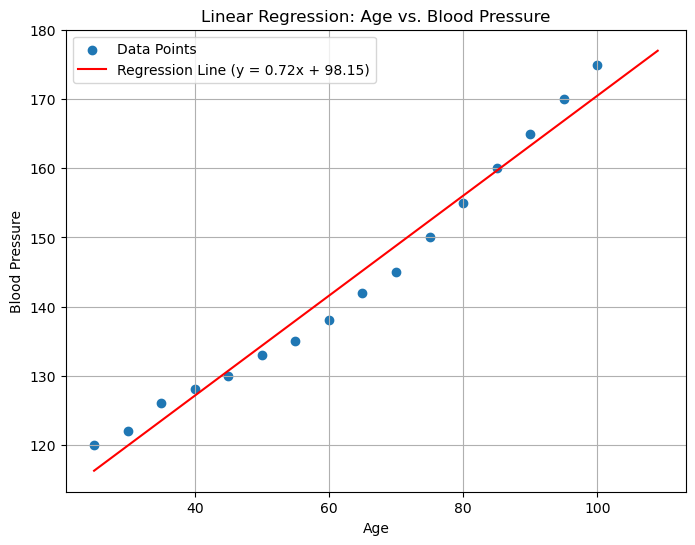

Regression Coefficients - Slope (m): 0.72, Intercept (b): 98.15
Predicted blood pressure for age 30: 119.86
Predicted blood pressure for age 40: 127.10
Predicted blood pressure for age 50: 134.33
Predicted blood pressure for age 60: 141.57


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Import necessary packages

# Step 2: Load the dataset and perform basic data exploration

data = {
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
    'BloodPressure': [120, 122, 126, 128, 130, 133, 135, 138, 142, 145, 150, 155, 160, 165, 170, 175]
}

df = pd.DataFrame(data)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Summary statistics
print("Summary statistics:\n", df.describe())

# Step 3: Create a scatter plot of age against blood pressure

plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['BloodPressure'], label='Data Points')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Scatter Plot of Age vs. Blood Pressure')
plt.grid(True)
plt.legend()
plt.show()

# Step 4: Build a simple linear regression model

# Create the regression model
regression_model = LinearRegression()

# Fit the model
regression_model.fit(df[['Age']], df['BloodPressure'])

# Get the coefficients
slope = regression_model.coef_[0]
intercept = regression_model.intercept_

# Create a range of ages for the regression line
age_range = range(min(df['Age']), max(df['Age']) + 10)

# Calculate the predicted blood pressure values
predicted_blood_pressure = regression_model.predict(pd.DataFrame(age_range, columns=['Age']))

# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['BloodPressure'], label='Data Points')
plt.plot(age_range, predicted_blood_pressure, color='red', label=f'Regression Line (y = {slope:.2f}x + {intercept:.2f})')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Linear Regression: Age vs. Blood Pressure')
plt.grid(True)
plt.legend()
plt.show()

# Display the regression coefficients
print(f'Regression Coefficients - Slope (m): {slope:.2f}, Intercept (b): {intercept:.2f}')

# Step 5: Make predictions using the regression model

example_ages = [30, 40, 50, 60]
predicted_values = regression_model.predict(pd.DataFrame(example_ages, columns=['Age']))

for age, prediction in zip(example_ages, predicted_values):
    print(f'Predicted blood pressure for age {age}: {prediction:.2f}')